In [1]:
from google.colab import files
uploaded = files.upload()



Saving seller_enrollment_dataset_25k.csv to seller_enrollment_dataset_25k.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [3]:
df = pd.read_csv("seller_enrollment_dataset_25k.csv")


In [4]:
df.shape        # (25000 rows, 18 columns)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   seller_id             25000 non-null  object 
 1   platform              25000 non-null  object 
 2   category              25000 non-null  object 
 3   kind                  25000 non-null  object 
 4   region                25000 non-null  object 
 5   impressions           25000 non-null  int64  
 6   clicks                25000 non-null  int64  
 7   enrolled              25000 non-null  int64  
 8   risk_rating           25000 non-null  float64
 9   manual_file_ingested  25000 non-null  object 
 10  optin_cta_tagged      25000 non-null  object 
 11  impression_tag_valid  25000 non-null  object 
 12  click_date            25000 non-null  object 
 13  enrollment_date       15813 non-null  object 
 14  product_opted         25000 non-null  object 
 15  campaign_id        

In [5]:
df.isnull().sum()


,0
seller_id,0
platform,0
category,0
kind,0
region,0
impressions,0
clicks,0
enrolled,0
risk_rating,0
manual_file_ingested,0


In [6]:
df['click_date'] = pd.to_datetime(df['click_date'])
df['enrollment_date'] = pd.to_datetime(df['enrollment_date'])


In [9]:
df['enrolled'] = df['enrolled'].map({'Yes': 1, 'No': 0})
df['manual_file_ingested'] = df['manual_file_ingested'].map({'Yes': 1, 'No': 0})
df['optin_cta_tagged'] = df['optin_cta_tagged'].map({'Yes': 1, 'No': 0})
df['impression_tag_valid'] = df['impression_tag_valid'].map({'Yes': 1, 'No': 0})



In [10]:
df[['enrolled','manual_file_ingested','optin_cta_tagged','impression_tag_valid']] = \
df[['enrolled','manual_file_ingested','optin_cta_tagged','impression_tag_valid']].fillna(0).astype(int)


In [11]:
df['calculated_conversion'] = df['clicks'] / df['impressions']


In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df['enrolled'].mean()


np.float64(0.0)

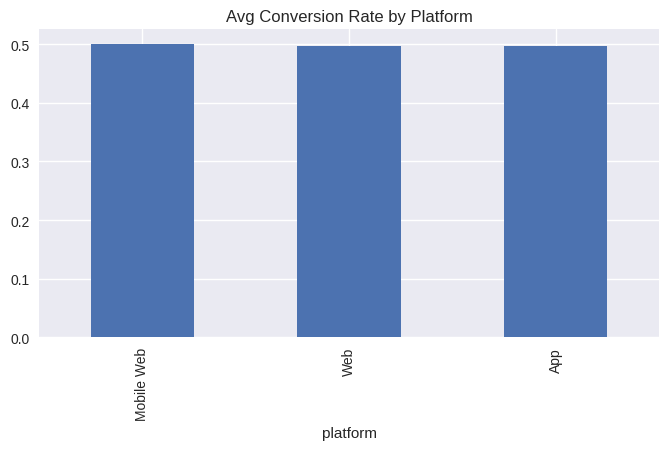

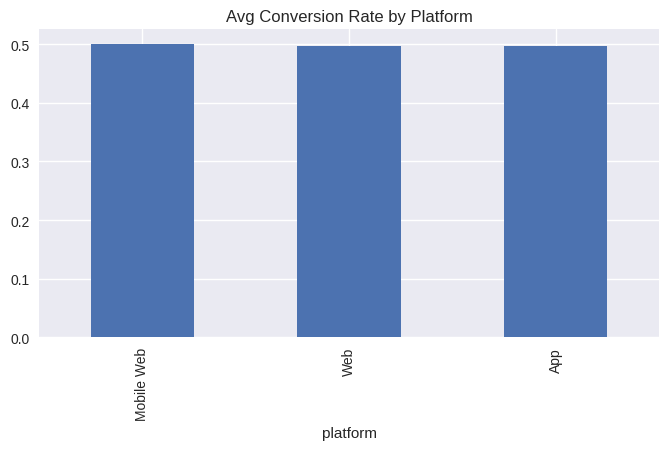

In [14]:
platform_summary = df.groupby('platform')['conversion_rate'].mean().sort_values(ascending=False)
platform_summary.plot(kind='bar', figsize=(8,4), title='Avg Conversion Rate by Platform')
plt.show()
platform_summary = df.groupby('platform')['conversion_rate'].mean().sort_values(ascending=False)
platform_summary.plot(kind='bar', figsize=(8,4), title='Avg Conversion Rate by Platform')
plt.show()


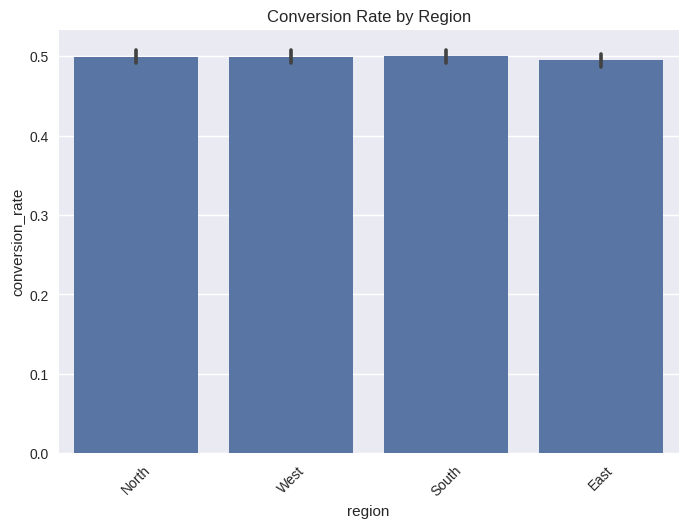

In [15]:
sns.barplot(data=df, x='region', y='conversion_rate')
plt.title("Conversion Rate by Region")
plt.xticks(rotation=45)
plt.show()


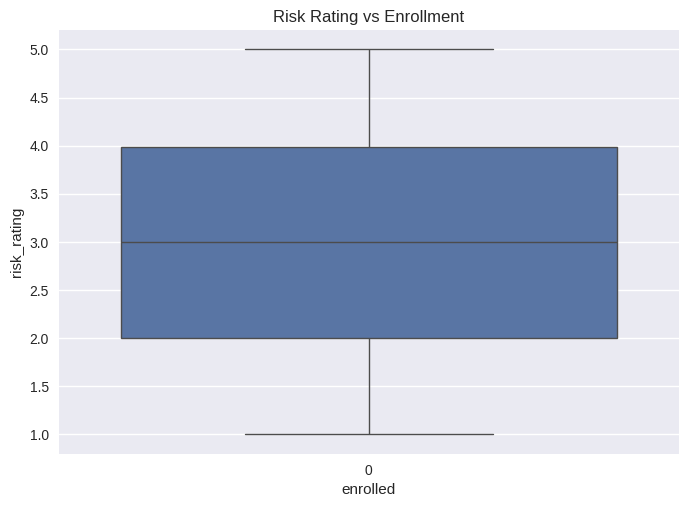

In [16]:
sns.boxplot(data=df, x='enrolled', y='risk_rating')
plt.title("Risk Rating vs Enrollment")
plt.show()


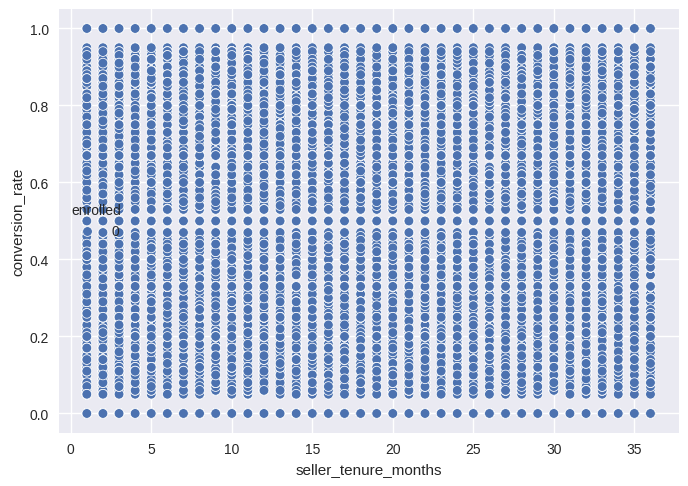

In [17]:
sns.scatterplot(data=df, x='seller_tenure_months', y='conversion_rate', hue='enrolled')
plt.show()


In [18]:
df['click_through_rate'] = df['clicks'] / df['impressions']
df['days_to_enroll'] = (df['enrollment_date'] - df['click_date']).dt.days


In [19]:
df.to_csv("cleaned_seller_enrollment_data.csv", index=False)


In [20]:
files.download("cleaned_seller_enrollment_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>